#### Jupyter Notebook to scrape kml files from the Forest clearance portal, Ministry of Environment and Forests, India.  
##### This notebook downloads all the files in a single folder. 

In [75]:
import pandas as pd
import os
import matplotlib.pyplot as plt

df = pd.read_excel(os. getcwd() + '/RecordsUpto2014.xlsx', index_col=0)
df['year'] = pd.DatetimeIndex(df['DATE_FROM_UA_TO_NODAL']).year

#year wise summary 
df['area'] = df['AREA_APPLIED'].groupby(df['year']).transform('sum')
df1 = df[['year','area']].copy()
df2 = df1.drop_duplicates().sort_values(by='year')

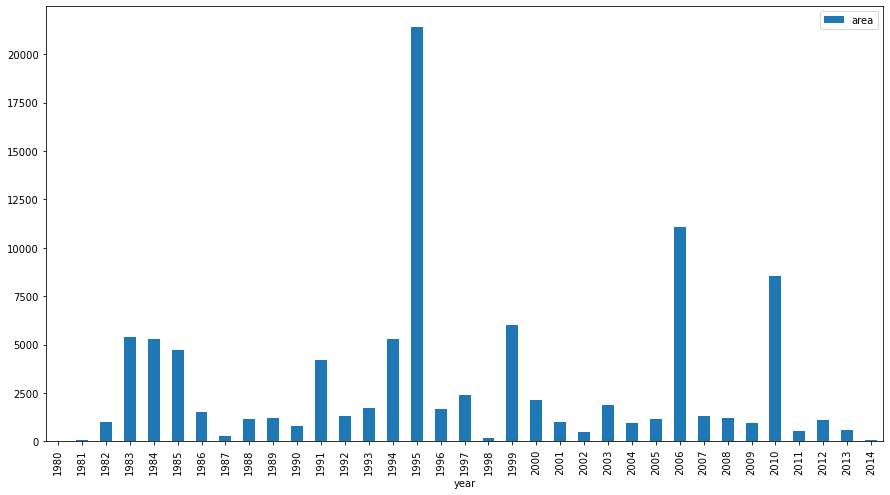

In [76]:
plt.rcParams["figure.figsize"] = [15, 8]

df2.plot.bar(x='year', y='area', rot=90)

In [97]:
import pandas as pd
import os
from itertools import cycle, islice
import matplotlib.pyplot as plt

df = pd.read_excel(os. getcwd() + '/RecordsUpto2014.xlsx', index_col=0)
df['year'] = pd.DatetimeIndex(df['DATE_FROM_UA_TO_NODAL']).year

#stacked bar based on category
#change categories
df.loc[df['CATEGORY'] == 'DISPENSARY/HOSPITAL', 'SUMMARY_CAT'] = 'Others' 
df.loc[df['CATEGORY'] == 'SCHOOL', 'SUMMARY_CAT'] = 'Others' 
df.loc[df['CATEGORY'] == 'ENCROACHMENTS', 'SUMMARY_CAT'] = 'Others' 
df.loc[df['CATEGORY'] == 'REHABILITATION', 'SUMMARY_CAT'] = 'Others' 
df.loc[df['CATEGORY'] == 'OTHERS', 'SUMMARY_CAT'] = 'Others' 
df.loc[df['CATEGORY'] == 'HYDEL', 'SUMMARY_CAT'] = 'Electricity' 
df.loc[df['CATEGORY'] == 'TRANSMISSION LINE', 'SUMMARY_CAT'] = 'Electricity' 
df.loc[df['CATEGORY'] == 'VILLAGE ELECTRICITY', 'SUMMARY_CAT'] = 'Electricity' 
df.loc[df['CATEGORY'] == 'WIND POWER', 'SUMMARY_CAT'] = 'Electricity' 
df.loc[df['CATEGORY'] == 'IRRIGATION', 'SUMMARY_CAT'] = 'Water' 
df.loc[df['CATEGORY'] == 'DRINKING WATER', 'SUMMARY_CAT'] = 'Water' 
df.loc[df['CATEGORY'] == 'QUARRYING', 'SUMMARY_CAT'] = 'Resource Extraction' 
df.loc[df['CATEGORY'] == 'MINING', 'SUMMARY_CAT'] = 'Resource Extraction' 
df.loc[df['CATEGORY'] == 'ROAD', 'SUMMARY_CAT'] = 'Linear Infrastructure' 
df.loc[df['CATEGORY'] == 'Railway', 'SUMMARY_CAT'] = 'Linear Infrastructure' 

#transpose data for stacked bar
df1 = df.groupby(['year','SUMMARY_CAT']).size().unstack().fillna(0) 

Text(0.5, 0, 'Year')

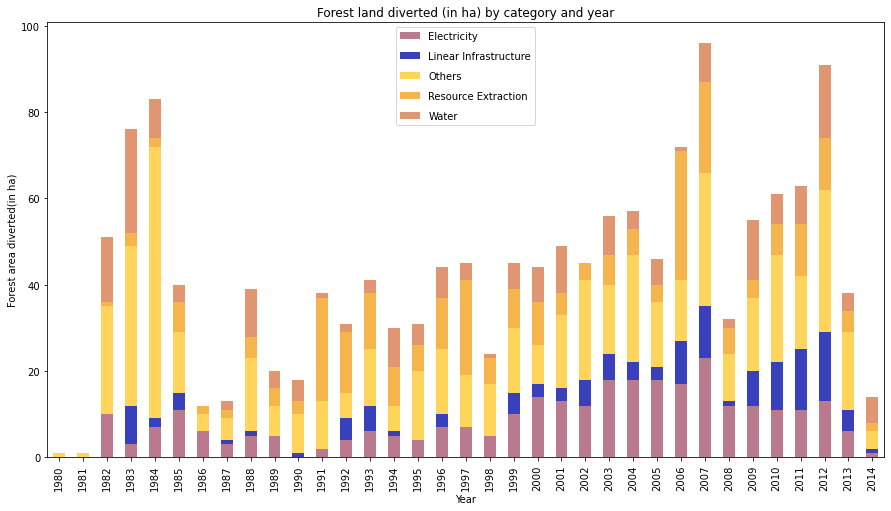

In [98]:
my_colors = list(islice(cycle(['#ba7a8d', '#3940bb', '#ffd45b', '#f6b44d', '#df9671']), None, len(df)))

plt.rcParams["figure.figsize"] = [15, 8]
df1.plot.bar(stacked = True, color=my_colors)
plt.legend(frameon=True,labelspacing=1, title='')
plt.title('Forest land diverted (in ha) by category and year')
plt.ylabel("Forest area diverted(in ha)")
plt.xlabel("Year")